# __Gym Exercise Analysis__

### Import packages

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from   plotly.subplots import make_subplots

### Read the Data

In [12]:
df = pd.read_csv("megaGymDataset.csv")

## Let's Edit Our Dataset

### Drop Columns

Let's drop the __Description__ and  __RatingDescription__ column as this doesn't really serve a purpose in our analysis

In [13]:
df = df.drop("Desc", axis=1)
df = df.drop("RatingDesc", axis=1)

### Drop Rows

Let's drop rows that do not have equipment specified (Less that 2% of the data)

In [8]:
df = df.dropna(subset=["Equipment"])

### Rename Columns

I rename some of the columns to make it easier for me.

In [14]:
df.columns = df.columns.str.replace("Unnamed: 0", "index")
df.columns = df.columns.str.replace("Type", "Category")

### What are the Number of Rows and Columns in our Dataset?

In [9]:
num_of_rows = len(df)
num_of_cols = len(df.columns)

print(f"Number of rows: {num_of_rows}")
print(f"Number of cols: {num_of_cols}")

Number of rows: 2886
Number of cols: 7


### Are There any Null Values?

In [10]:
df.isnull().sum()

index           0
Title           0
Category        0
BodyPart        0
Equipment       0
Level           0
Rating       1884
dtype: int64

Let's get the percentage for null values for each column if they're not zero

In [15]:
null_count = df.Rating.isnull().sum()
percentage = (null_count / num_of_rows) * 100

print(f"Null values in Rating column: {percentage:.2f}%")

Null values in Rating column: 65.38%


<!-- - Equipment: __1.10%__
  - We can drop this as this is only a small amount -->
- Rating: __64.67%__
  - We can't drop rows that don't include a rating due to the large amount. However, this can be ignored as this is based on user opinion.

### This is What our DataFrame Looks Like

In [10]:
df

,index,Title,Category,BodyPart,Equipment,Level,Rating
0,0,Partner plank band row,Strength,Abdominals,Bands,Intermediate,0.0
1,1,Banded crunch isometric hold,Strength,Abdominals,Bands,Intermediate,NaN
2,2,FYR Banded Plank Jack,Strength,Abdominals,Bands,Intermediate,NaN
3,3,Banded crunch,Strength,Abdominals,Bands,Intermediate,NaN
4,4,Crunch,Strength,Abdominals,Bands,Intermediate,NaN
...,...,...,...,...,...,...,...
2913,2913,EZ-bar skullcrusher-,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,Strength,Triceps,E-Z Curl Bar,Beginner,8.1
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN
2916,2916,TBS Skullcrusher,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN


## What Types of Exercises are Included?

In total there are seven categories.

In [11]:
list(df.Category.unique())

['Strength',
 'Plyometrics',
 'Cardio',
 'Stretching',
 'Powerlifting',
 'Strongman',
 'Olympic Weightlifting']

Let's calculate the number of exercises in each category.

In [18]:
df_categories = df.groupby(["Category"]).count()

df_categories = df_categories.sort_values(by="index", ascending=False)

fig = px.bar(
    df_categories,
    x = df_categories.index,
    y = "index",
    color = df_categories.index,
    title = "Categories",
    labels = {"index":"Number of exercises"}
)

fig

Almost all of the exercises are to train for strength.

## What Parts of the Body do these Exercises Train?

In [19]:
list(df.BodyPart.unique())

['Abdominals',
 'Adductors',
 'Abductors',
 'Biceps',
 'Calves',
 'Chest',
 'Forearms',
 'Glutes',
 'Hamstrings',
 'Lats',
 'Lower Back',
 'Middle Back',
 'Traps',
 'Neck',
 'Quadriceps',
 'Shoulders',
 'Triceps']

##### In Total There are?

In [20]:
df.BodyPart.nunique()

17

Let's see how many of these exercises are included for each bodypart.

In [40]:
df_bodyParts = df.groupby(["BodyPart"]).count()

df_bodyParts = df_bodyParts.sort_values(by="index", ascending=False)

fig = px.bar(
    df_bodyParts,
    x = df_bodyParts.index,
    y = "index",
    color = df_bodyParts.index
)

fig

Most of these exercises are for the abdominal and quadriceps muscles.

## How Much of the Equipment is Used?

In [41]:
df_equip = df.groupby(["Equipment"]).count()

df_equip

,index,Title,Category,BodyPart,Level,Rating
Equipment,,,,,,
Bands,100,100,100,100,100,30
Barbell,282,282,282,282,282,180
Body Only,1078,1078,1078,1078,1078,269
Cable,226,226,226,226,226,77
Dumbbell,516,516,516,516,516,140
E-Z Curl Bar,22,22,22,22,22,11
Exercise Ball,35,35,35,35,35,12
Foam Roll,11,11,11,11,11,9
Kettlebells,149,149,149,149,149,57


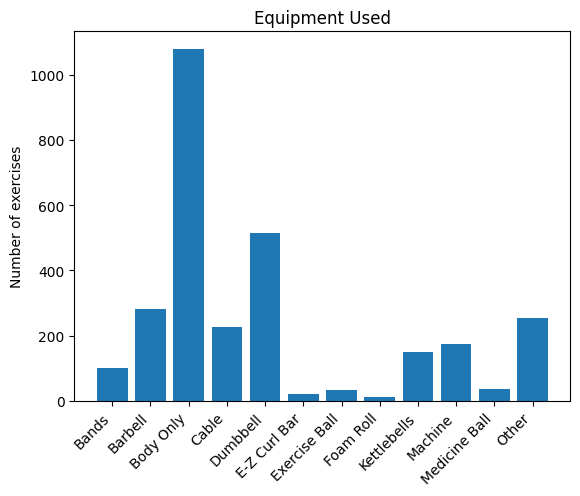

In [42]:
fig = plt.subplots()[1]

fig.bar(
    df_equip.index,
    df_equip.Title
)

fig.set_ylabel("Number of exercises")
fig.set_title("Equipment Used")

plt.xticks(
    rotation=45,
    ha="right"
)

plt.show()

Its clear that there a lot more body weight exercises than all the others. Dumbbells and Barbells exercises also have a good count over bands and cables.

## Percentage of Exercises by Levels

Let's see how many beginner, intermediate, and expert exercises are there

In [31]:
df_level = df.groupby(["Level"]).count()

df_level

,index,Title,Category,BodyPart,Equipment,Rating
Level,,,,,,
Beginner,459,459,459,459,434,459
Expert,13,13,13,13,13,7
Intermediate,2446,2446,2446,2446,2439,565


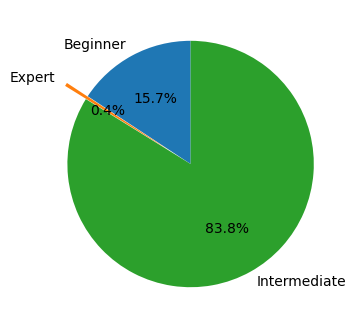

In [33]:
fig = plt.subplots(figsize=(4, 4))[1]

fig.pie(
    df_level.Title,
    explode = (0, 0.2, 0),
    labels = df_level.index,
    autopct = "%1.1f%%",
    startangle = 90
)

plt.show()

Based on this dataset, there are a lot of exercises that can be performed by people who have an Intermediate level of fitness. Only 0.4% of the exercises are those that need to be performed by experts.

## What if you're a beginner? What Muscles Will you Work on Based on This Dataset?

In [24]:
df_beginner = df[df.Level=="Beginner"]

Most beginners usually start at home or with minimal equipment. 

In [25]:
df_beg_bodyOnly = df_beginner[df_beginner.Equipment=="Body Only"]

df_beg_bodyOnly

,index,Title,Category,BodyPart,Equipment,Level,Rating
194,194,Gorilla Chin/Crunch,Strength,Abdominals,Body Only,Beginner,9.0
202,202,Crunch - Hands Overhead,Strength,Abdominals,Body Only,Beginner,8.6
204,204,Stomach Vacuum,Stretching,Abdominals,Body Only,Beginner,8.5
208,208,Butt-Ups,Strength,Abdominals,Body Only,Beginner,8.3
217,217,Janda Sit-Up,Strength,Abdominals,Body Only,Beginner,7.4
...,...,...,...,...,...,...,...
2175,2175,Slow Jog,Cardio,Quadriceps,Body Only,Beginner,0.0
2178,2178,Square Hop,Plyometrics,Quadriceps,Body Only,Beginner,0.0
2731,2731,Seated Front Deltoid,Stretching,Shoulders,Body Only,Beginner,4.5
2889,2889,Standing Towel Triceps Extension,Strength,Triceps,Body Only,Beginner,6.5


In [44]:
# This will grab the number of exercises for each body part
beginner_bodyOnly = df_beg_bodyOnly.groupby(["BodyPart"]).count()

# Organize that data in descending order
beginner_bodyOnly = beginner_bodyOnly.sort_values(by="index", ascending=False)

fig = px.bar(
    beginner_bodyOnly,
    x = beginner_bodyOnly.index,
    y = "index",
    color = "index"
)

fig

The chest has the most amount of body weight exercises whereas shoulders has the lowest.

## What Kinds of Muscles are Worked on in Each Category?

In [46]:
bodyPart_dist = df.groupby(["Category","BodyPart"]).count()

In [47]:
categoryDfs = []
categories  = df["Category"].unique()

for i in range(len(categories)):
    categoryDfs.append(
        bodyPart_dist.iloc[
            bodyPart_dist.index.get_level_values("Category") == categories[i]
        ]
    )

In [48]:
fig = make_subplots(
    rows = 4,
    cols = 2,
    specs = [[{"type":"domain"},{"type":"domain"}],
            [{"type":"domain"},{"type":"domain"}],
            [{"type":"domain"},{"type":"domain"}],
            [{"type":"domain"},{"type":"domain"}]
        ]
)

row = 1
col = 1

for i in range(len(categories)):
    fig.add_trace(
        go.Pie(
            title  = categories[i],
            values = categoryDfs[i]["index"].values,
            labels = categoryDfs[i].index.get_level_values("BodyPart"),
        ),
        row = row,
        col = col
    )

    if col == 1:
        col += 1
    elif col == 2:
        col = 1
        row += 1

fig.update_layout(height=1400, showlegend=True)

From the above plots and pie charts, we can see that...
- Almost 70% of cardio exercises target the quadriceps.
- The distribution of amount of exercises is very uniform in stretching.
- Powerlifting workouts mainly target only the triceps, lower back, quads,chest, glutes and hamstrings. This can be a be a reason why most power lifting do not have six pack abs and a defined upper back. The same goes for Olympic Weightlifting.
- Cardio does not hit any arm related muscles.
- Plyometric targets chest and quads a lot which makes sense because of the control factor required to do these exercises.

# Top Rated Exercises

Let's see the best exercises overall

In [67]:
ratingSorted = df.sort_values(by="Rating",ascending=False)

ratingSorted.head(10)

,index,Title,Category,BodyPart,Equipment,Level,Rating
2065,2065,Single-Leg Press,Strength,Quadriceps,Machine,Intermediate,9.6
1195,1195,Rickshaw Carry,Strongman,Forearms,Other,Beginner,9.6
1179,1179,Palms-down wrist curl over bench,Strength,Forearms,Barbell,Intermediate,9.5
1451,1451,Weighted pull-up,Strength,Lats,Other,Intermediate,9.5
1798,1798,Clean from Blocks,Olympic Weightlifting,Quadriceps,Barbell,Beginner,9.5
1695,1695,T-Bar Row with Handle,Strength,Middle Back,Other,Intermediate,9.5
2525,2525,Dumbbell front raise to lateral raise,Strength,Shoulders,Dumbbell,Intermediate,9.5
88,88,Landmine twist,Strength,Abdominals,Other,Intermediate,9.5
1577,1577,Atlas Stones,Strongman,Lower Back,Other,Intermediate,9.5
731,731,Incline Hammer Curls,Strength,Biceps,Dumbbell,Beginner,9.5


The top rated exercise is the Single Leg Press followed by Rickshaw Carry and Palms-down wrist curl over bench. This is surprising as two forearm exercises in the top 3 as it's a muscle that often gets overlooked.

### Top Rated Exercises in the __Power Lifting__ Category

In [227]:
df_bestPowerLift = df[df.Category=="Powerlifting"].sort_values(by="Rating",ascending=False)
df_bestPowerLift = df_bestPowerLift.head(10)

df_bestPowerLift

,index,Title,Category,BodyPart,Equipment,Level,Rating
1538,1538,Barbell deficit deadlift,Powerlifting,Lower Back,Barbell,Beginner,9.4
1214,1214,Barbell glute bridge,Powerlifting,Glutes,Barbell,Intermediate,9.4
1800,1800,Barbell back squat to box,Powerlifting,Quadriceps,Barbell,Intermediate,9.3
1294,1294,Sumo deadlift,Powerlifting,Hamstrings,Barbell,Beginner,9.3
2791,2791,Dumbbell floor press,Powerlifting,Triceps,Dumbbell,Intermediate,9.3
1215,1215,Barbell Hip Thrust,Powerlifting,Glutes,Barbell,Intermediate,9.1
1807,1807,Box Squat with Bands,Powerlifting,Quadriceps,Barbell,Beginner,9.0
1809,1809,Squat with Chains,Powerlifting,Quadriceps,Barbell,Beginner,9.0
1539,1539,Deadlift with Bands,Powerlifting,Lower Back,Barbell,Beginner,8.7
2774,2774,Bench Press - Powerlifting,Powerlifting,Triceps,Barbell,Intermediate,8.7


<BarContainer object of 10 artists>

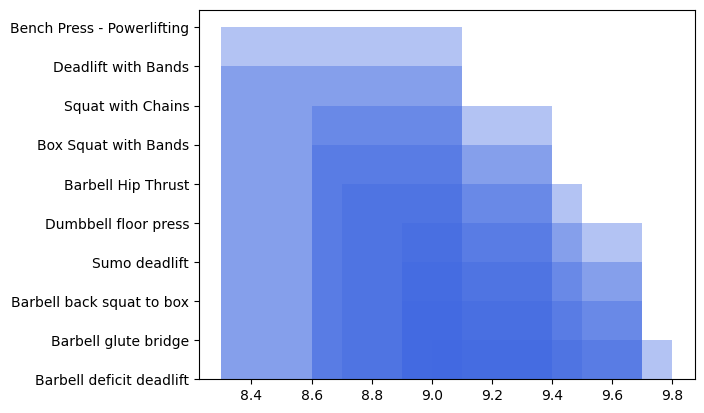

In [226]:
plt.bar(
    ratingSorted.Rating,
    ratingSorted.Title,
    color="royalblue",
    alpha=0.4
)

Overall these exercises are rated around 9.0. Barbell deficit deadlifts, glute brides and dumbbell floor press are the top rated powerlifting exercises.

### Top Rated Exercises in the __Stretching__ Category

In [231]:
df_bestStretching = df[df.Category=="Stretching"].sort_values(by="Rating",ascending=False)
df_bestStretching = df_bestStretching.head(10)

df_bestStretching

,index,Title,Category,BodyPart,Equipment,Level,Rating
672,672,Groiners,Stretching,Adductors,Body Only,Beginner,8.8
671,671,Standing Hip Circles,Stretching,Abductors,Body Only,Beginner,8.8
204,204,Stomach Vacuum,Stretching,Abdominals,Body Only,Beginner,8.5
1368,1368,Standing leg swing,Stretching,Hamstrings,Body Only,Beginner,8.4
1595,1595,Superman,Stretching,Lower Back,Body Only,Intermediate,8.3
665,665,Iliotibial band SMR,Stretching,Abductors,Foam Roll,Intermediate,8.2
674,674,Windmills,Stretching,Abductors,Body Only,Intermediate,8.0
1371,1371,Leg-Up Hamstring Stretch,Stretching,Hamstrings,Body Only,Intermediate,7.8
675,675,Side Leg Raises,Stretching,Adductors,Body Only,Beginner,7.7
1372,1372,Inchworm,Stretching,Hamstrings,Body Only,Beginner,7.5


<BarContainer object of 10 artists>

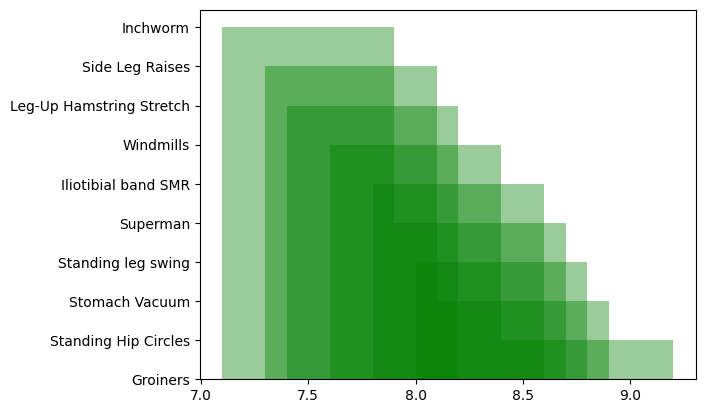

In [232]:
plt.bar(
    df_bestStretching.Rating,
    df_bestStretching.Title,
    color = "green",
    alpha = 0.4
)

Overall these exercises are rated around 8.0-8.2. Groiners, standing hip circles, and stomach vacuum are the top rated stretching exercises.

### Top Rated Exercises in the __Plyometrics__ Category

In [234]:
df_bestPylo = df[df.Category=="Plyometrics"].sort_values(by="Rating",ascending=False)
df_bestPylo = df_bestPylo.head(10)

df_bestPylo

,index,Title,Category,BodyPart,Equipment,Level,Rating
1998,1998,Single Leg Push-off,Plyometrics,Quadriceps,Other,Beginner,9.2
2120,2120,Side-to-side box skip,Plyometrics,Quadriceps,Body Only,Intermediate,8.9
1158,1158,Drop Push,Plyometrics,Chest,Other,Beginner,8.8
2122,2122,Broad jump,Plyometrics,Quadriceps,Body Only,Intermediate,8.8
196,196,Mountain climber,Plyometrics,Abdominals,Body Only,Intermediate,8.8
1335,1335,Box jump,Plyometrics,Hamstrings,Other,Beginner,8.6
96,96,Sledgehammer swing,Plyometrics,Abdominals,Other,Intermediate,8.6
2126,2126,Jumping jack-,Plyometrics,Quadriceps,Body Only,Intermediate,8.5
2125,2125,Scissors Jump,Plyometrics,Quadriceps,Body Only,Expert,8.5
1098,1098,Chest Push (multiple response),Plyometrics,Chest,Medicine Ball,Beginner,8.3


<BarContainer object of 10 artists>

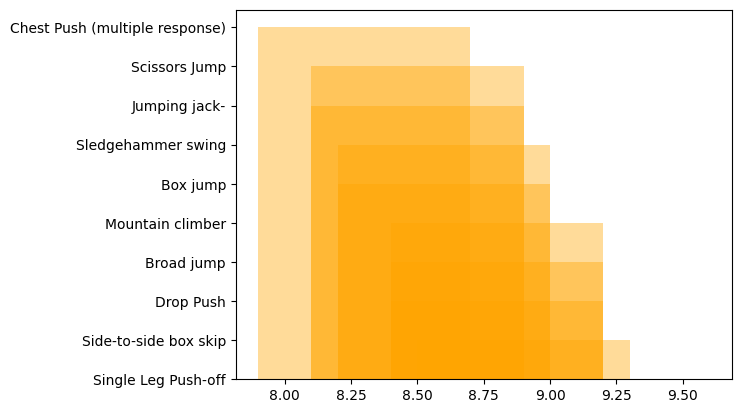

In [235]:
plt.bar(
    df_bestPylo.Rating,
    df_bestPylo.Title,
    color = "orange",
    alpha = 0.4
)

Overall these exercises are rated around 8.5-8.75. Single leg push-off, side-to-side box skip, and drop push are the top rated pylometric exercises.

## Best/Worst Leg Exercises to Target Strength

Let's list the muscles involved in Leg exercises

In [187]:
leg_muscles = [
    "Calves",
    "Glutes",
    "Hamstrings",
    "Quadriceps"
]

Let's grab the 5 best exercises

In [192]:
df_legsBest = df[df.BodyPart.isin(leg_muscles)].sort_values(by="Rating",ascending=False)
df_legsBest = df_legsBest[df_legsBest.Category=="Strength"].head(5)

df_legsBest

,index,Title,Category,BodyPart,Equipment,Level,Rating
2065,2065,Single-Leg Press,Strength,Quadriceps,Machine,Intermediate,9.6
1799,1799,Barbell Full Squat,Strength,Quadriceps,Barbell,Intermediate,9.4
1329,1329,Romanian Deadlift With Dumbbells,Strength,Hamstrings,Dumbbell,Beginner,9.4
1292,1292,Barbell Deadlift,Strength,Hamstrings,Barbell,Intermediate,9.4
886,886,Smith Machine Calf Raise,Strength,Calves,Machine,Intermediate,9.2


Let's grab the worst exercises with at least a rating higher than 0

In [193]:
df_legsWorst = df[df.BodyPart.isin(leg_muscles)].sort_values(by="Rating",ascending=True)
df_legsWorst = df_legsWorst[df_legsWorst.Category=="Strength"]
df_legsWorst = df_legsWorst[df_legsWorst.Rating > 0].head(5)

df_legsWorst

,index,Title,Category,BodyPart,Equipment,Level,Rating
1288,1288,Downward Facing Balance,Strength,Glutes,Exercise Ball,Beginner,4.0
876,876,Calf Raise On A Dumbbell,Strength,Calves,Dumbbell,Beginner,4.8
868,868,Calf Raises - With Bands,Strength,Calves,Bands,Beginner,4.8
1324,1324,Alternating Hang Clean,Strength,Hamstrings,Kettlebells,Beginner,4.9
1832,1832,Front Barbell Squat To A Bench,Strength,Quadriceps,Barbell,Beginner,5.3


Let's put that in a graph

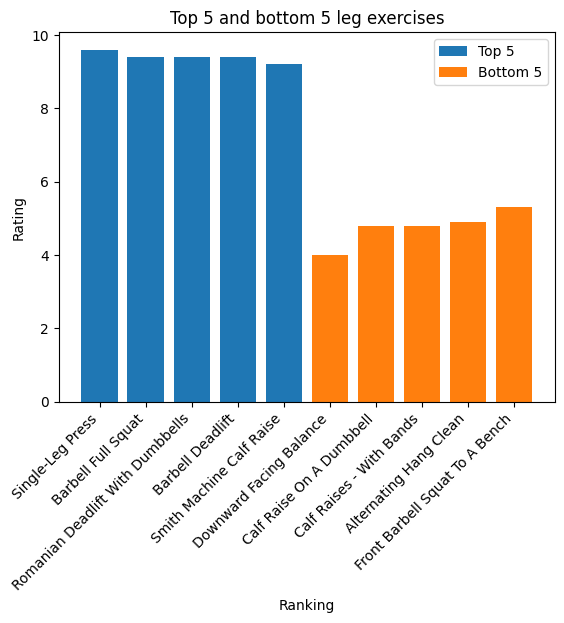

In [203]:
plt.bar(
    df_legsBest.Title,
    df_legsBest.Rating,
    label = "Top 5"
)

plt.bar(
    df_legsWorst.Title,
    df_legsWorst.Rating,
    label = "Bottom 5"
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Ranking")
plt.ylabel("Rating")
plt.title("Top 5 and bottom 5 leg exercises")
plt.legend()

plt.show()

From this graph we can see the squat and deadlift making the top 5 of leg exercises which makes sense as these are the big 5 compound exercises (bench press, shoulder press, pullup, squat, deadlift)

## Best/Worst Push Exercises for Strength

What are __push__ exercises you may ask, they're exercises where you push your arms foward. Exercises such as bench press, overhead press, and dip. They are mostly associated with muscles in front of your upper body.

Let's list the muscles involved in push exercises

In [51]:
push_muscles = [
    "Chest",
    "Shoulders",
    "Triceps"
]

Let's grab the 5 best exercises

In [52]:
df_pushBest = df[df.BodyPart.isin(push_muscles)].sort_values(by="Rating",ascending=False)
df_pushBest = df_pushBest[df_pushBest.Category=="Strength"].head(5)

df_pushBest

,index,Title,Category,BodyPart,Equipment,Level,Rating
2525,2525,Dumbbell front raise to lateral raise,Strength,Shoulders,Dumbbell,Intermediate,9.5
2882,2882,Triceps dip,Strength,Triceps,Body Only,Intermediate,9.4
2448,2448,Clean and press,Strength,Shoulders,Barbell,Intermediate,9.4
2526,2526,Single-arm palm-in dumbbell shoulder press,Strength,Shoulders,Dumbbell,Intermediate,9.4
2527,2527,Standing palms-in shoulder press,Strength,Shoulders,Dumbbell,Intermediate,9.3


Let's grab the 5 worst exercises with a rating greater than 0

In [53]:
df_pushWorst = df[df.BodyPart.isin(push_muscles)].sort_values(by="Rating",ascending=True)
df_pushWorst = df_pushWorst[df_pushWorst.Category=="Strength"]
df_pushWorst = df_pushWorst[df_pushWorst.Rating > 0].head(5)

df_pushWorst

,index,Title,Category,BodyPart,Equipment,Level,Rating
2499,2499,Double-kettlebell windmill,Strength,Shoulders,Kettlebells,Intermediate,3.0
916,916,Bench Press - With Bands,Strength,Chest,Bands,Beginner,5.5
955,955,Kettlebell alternating floor press,Strength,Chest,Kettlebells,Beginner,6.0
954,954,Extended Range One-Arm Kettlebell Floor Press,Strength,Chest,Kettlebells,Beginner,6.3
2805,2805,Dumbbell Tricep Extension -Pronated Grip,Strength,Triceps,Dumbbell,Beginner,6.3


Let's put that in a graph

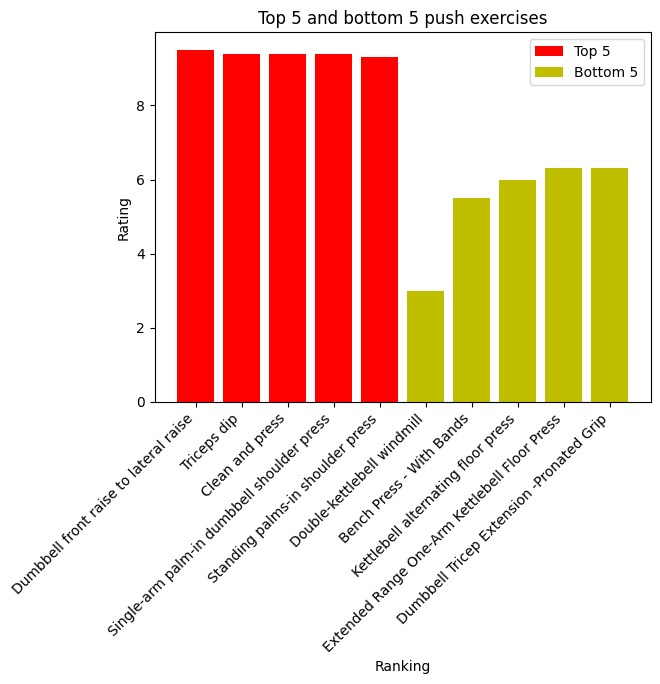

In [54]:
plt.bar(
    df_pushBest.Title,
    df_pushBest.Rating,
    color = 'r',
    label = "Top 5"
)

plt.bar(
    df_pushWorst.Title,
    df_pushWorst.Rating,
    color = 'y',
    label = "Bottom 5"
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Ranking")
plt.ylabel("Rating")
plt.title("Top 5 and bottom 5 push exercises")
plt.legend()

plt.show()

## Best/Worst Pull Exercises for Strength

What are __pull__ exercises you may ask, they're exercises where you pull your arms towards yourself. Exercises such as the pullup, lat pulldown, and cable row. They are mostly associated with muscles in on your back.

Let's list the muscles involved in pull exercises

In [56]:
pull_muscles = [
    "Biceps",
    "Lats",
    "Lower Back",
    "Middle Back",
    "Traps"
]

Let's grab the 5 best exercises

In [57]:
df_pullBest = df[df.BodyPart.isin(pull_muscles)].sort_values(by="Rating",ascending=False)
df_pullBest = df_pullBest[df_pullBest.Category=="Strength"].head(5)

df_pullBest

,index,Title,Category,BodyPart,Equipment,Level,Rating
1451,1451,Weighted pull-up,Strength,Lats,Other,Intermediate,9.5
1695,1695,T-Bar Row with Handle,Strength,Middle Back,Other,Intermediate,9.5
731,731,Incline Hammer Curls,Strength,Biceps,Dumbbell,Beginner,9.5
705,705,Wide-grip barbell curl,Strength,Biceps,Barbell,Beginner,9.3
1767,1767,Smith machine shrug,Strength,Traps,Machine,Intermediate,9.2


Let's grab the 5 worst exercises

In [58]:
df_pullWorst = df[df.BodyPart.isin(pull_muscles)].sort_values(by="Rating",ascending=True)
df_pullWorst = df_pullWorst[df_pullWorst.Category=="Strength"]
df_pullWorst = df_pullWorst[df_pullWorst.Rating > 0].head(5)

df_pullWorst

,index,Title,Category,BodyPart,Equipment,Level,Rating
715,715,Lying High Bench Barbell Curl,Strength,Biceps,Barbell,Beginner,5.8
1644,1644,Barbell seal row,Strength,Middle Back,Barbell,Intermediate,6.2
1704,1704,One Arm Chin-Up,Strength,Middle Back,Other,Beginner,6.3
1703,1703,Inverted Row with Straps,Strength,Middle Back,Other,Beginner,6.4
1643,1643,Straight Bar Bench Mid Rows,Strength,Middle Back,Barbell,Beginner,6.5


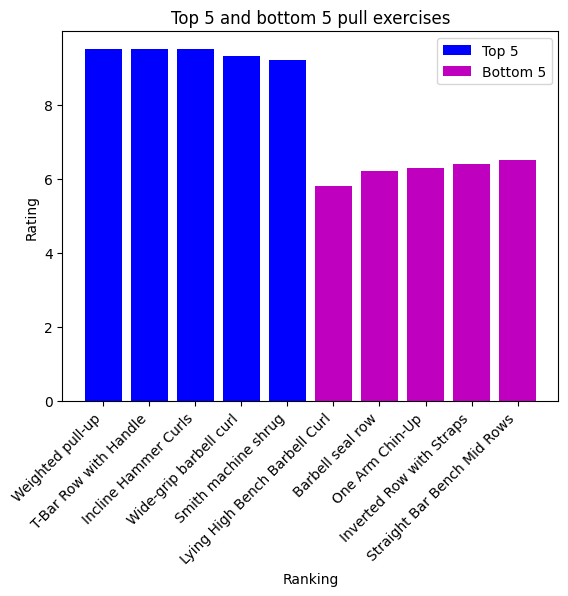

In [59]:
plt.bar(
    df_pullBest.Title,
    df_pullBest.Rating,
    color = 'b',
    label = "Top 5"
)

plt.bar(
    df_pullWorst.Title,
    df_pullWorst.Rating,
    color = 'm',
    label = "Bottom 5"
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Ranking")
plt.ylabel("Rating")
plt.title("Top 5 and bottom 5 pull exercises")
plt.legend()

plt.show()